In [1]:
from helper_fns import *

In [2]:
import os,sys
from IPython.display import Image

In [3]:
dataset = 'simulated'
threshold_type = 'absolute'

In [4]:
muh_fun_range = ['linear_regression','support_vector','knn', 'polynomial_regression']
models = ['Linear Regression','SVR','KNN', 'Polynomial Regression']
sim_data_size_range = [100, 200, 400, 600, 800, 1000]


cp_types = ['Jacknife+', 'Wt_Jacknife+', 'CV+', 'Wt_CV+', 'Split',  'Wt_Split', 'Residuals']
compare_labels = ['Jacknife+', 'CV+','Split', 'Residuals']
bias_range = [0, 100, 150, 200]
tau = 10
ntrial = 100

In [5]:
bias = bias_range[0]
sim_data_size = sim_data_size_range[-1]
muh_fun = muh_fun_range[-1]
model = models[-1]

In [6]:
if (dataset == 'simulated'):
    print('with size ' + str(sim_data_size) + ' and bias ' + str(bias))
    #filler = '/bias_' + str(int(bias)) + '/sim_data_size_' + str(sim_data_size) + '/'
    filler = '/No_bias/sim_data_size_' + str(sim_data_size) + '/'
else:
    filler = '/'

with size 1000 and bias 0


In [7]:
cmap = ['#c3e2e3', '#7399b8','#424673', '#FFA500']
cmap_paired = [ '#c3e2e3', '#95c0ce', '#7399b8', '#59709c', '#424673', '#27213f', '#FFA500']

### Define variables and load in data

In [8]:
simulated_data = pd.read_csv('0.Datasets/simulated/simulated_data.csv')
simulated_data = simulated_data[0:sim_data_size]
X_simulated = simulated_data.iloc[:, 0:2].values
Y_simulated = simulated_data.iloc[:, 2].values
n_simulated = len(Y_simulated)

In [9]:
n_total = len(Y_simulated)
n_train = int(0.7*n_total)
n_test = n_total - n_train

In [10]:
X_train, Y_train, X_test, Y_test = generate_data_for_trials(1, n_train, n_total, eval('X_' + dataset), eval('Y_' + dataset), bias)

X_train = X_train[0]
Y_train = Y_train[0]
X_test = X_test[0]
Y_test = Y_test[0]

In [11]:
predictions_by_model = [linear_regression(X_train, Y_train, X_test),
                       support_vector(X_train, Y_train, X_test),
                       knn(X_train, Y_train, X_test),
                       polynomial_regression(X_train, Y_train, X_test)]

### Graphing function

In [12]:
def plot_interval_sequence(filler, dataset, model, Y_test, Y_pred, threshold_type = 'absolute', tau = 10, max_count = 100):
    
    if threshold_type == 'absolute':
        test_lower_limit = Y_pred - tau
        test_upper_limit = Y_pred + tau
    else:
        test_lower_limit = Y_pred - tau*np.abs(Y_pred)
        test_upper_limit = Y_pred + tau*np.abs(Y_pred)
    

    # Plot at most max_count predictions
    if len(Y_test) <= max_count:
        max_count = len(Y_test)

    optimal_width = max_count / 4
    if optimal_width < 4:
        optimal_width = 4
    plt.figure(figsize = (optimal_width - 10, 8))
    ax = plt.gca() 
        
    valid_interval = (Y_test < test_upper_limit) & (Y_test > test_lower_limit)
    colors = np.array(['#e67e22', '#27ae60'])[valid_interval[:max_count].astype(int)]
    markers = np.array(['^', 'x'])[valid_interval[:max_count].astype(int)]
    
    
    for i in range(max_count):
        ax.plot([i, i], [test_lower_limit[i], test_upper_limit[i]], c = '#3498db')   
        ax.plot([i, i], [test_lower_limit[i], test_upper_limit[i] + 0.25], '_',c = '#3498db')
   
        ax.scatter(range(max_count)[i], Y_test[:max_count][i], marker = markers[i], zorder = 3, color = colors[i])
    
    legend_elements = [Line2D([0], [0],label ='Prediction band for Y'),
                       Line2D([0], [0], marker = 'X', color = 'w', label = 'True Y inside prediction band', markerfacecolor = '#27ae60'),
                       Line2D([0], [0], marker = '^', color = 'w', label = 'True Y outside prediction band', markerfacecolor = '#e67e22')]
    
    # Plot the observed samples
    ax.set_ylabel('Y', fontsize = 14)
    ax.set_xlabel('Test point index', fontsize = 14)
    ax.legend(handles = legend_elements)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    plt.title('True value vs '+ model + ' prediction')
    plt.savefig(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                                    model + '/plots/prediction_intervals_' + dataset +'.png')
    
    return ax

In [13]:
# for i in range(len(muh_fun_range)):
#     plot_interval_sequence(filler, 'simulated', muh_fun_range[i], Y_test, predictions_by_model[i], 'relative', 0.175)

In [14]:
#plot_interval_sequence(filler, 'simulated', muh_fun, Y_test, predictions_by_model[-1], 'absolute', 10)

In [15]:
#plot_interval_sequence(filler, 'simulated', muh_fun, Y_test, predictions_by_model[-1], 'relative', 0.175)

### CP Results

In [16]:
mean_coverage_by_trial = pd.read_csv(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                                muh_fun + '/JAWS_coverage_by_trial/mean_coverage.csv')

In [17]:
mean_coverage_by_trial

,Jacknife+,CV+,Split,Actual,True Probability
0,0.946106,0.945920,0.945869,0.946667,0.950374
1,0.934308,0.927641,0.931624,0.960000,0.941025
2,0.958379,0.955468,0.937322,0.920000,0.945806
3,0.936286,0.935773,0.928775,0.966667,0.945491
4,0.938968,0.935958,0.931624,0.946667,0.950374
...,...,...,...,...,...
95,0.945602,0.940661,0.937322,0.936667,0.946437
96,0.949330,0.943186,0.948718,0.933333,0.939535
97,0.939586,0.935340,0.951567,0.960000,0.951522
98,0.939895,0.937722,0.931624,0.943333,0.943390


In [18]:
for i in range(len(mean_coverage_by_trial.columns[0:3])):
    print(np.var(mean_coverage_by_trial.iloc[:,i])**0.5) 

0.005214940199269762
0.005520738357600091
0.013713621278722733


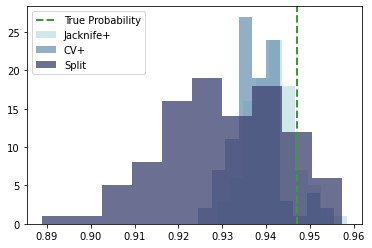

In [19]:
plt.axvline(x = np.mean(mean_coverage_by_trial['True Probability']), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability')
for i in range(len(mean_coverage_by_trial.columns[0:3])):
    plt.hist(mean_coverage_by_trial.iloc[:,i],  
             alpha = 0.78, 
             color = cmap[i],
             label = mean_coverage_by_trial.columns[i] )

plt.legend(loc = 'upper left')
plt.savefig(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                            muh_fun +  '/plots/JAWS_mean_results_' + dataset +'.png')

#Image(dataset + filler + 'Threshold_type_' + threshold_type + '/' + muh_fun + \
#          '/plots/JAWS_mean_results_' + dataset + '.png', width = 600, height = 700)

### Simulated data - model comparison

In [20]:
def residuals_prob(sim_data_size, model, ntrial):
    
    Cal_Res = pd.read_csv(dataset + '/No_bias' + '/sim_data_size_' + str(sim_data_size) + '/' + \
                          str(model) + '_' + str(ntrial) + 'Trial'  +'_Cal_Res.csv')
    
    coverage_prob_normal = []

    for i in range(ntrial):    
        res = (Cal_Res[Cal_Res['itrial'] == i]['value']).values
        mean_res = np.mean(res)
        sigma_res = np.std(res)
        coverage_prob_normal.append(2*norm.cdf((tau - mean_res)/sigma_res) - 1)
    
    return coverage_prob_normal

In [21]:
def coverage_by_type(cp_types, sim_data_size, threshold_type, model):
    
    dataset = 'simulated'

    coverage_by_dataset_size = []

    for i in range(len(sim_data_size)):
        coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                '/Threshold_type_' + str(threshold_type) + '/' + model + \
                                '/JAWS_coverage_by_trial/mean_coverage.csv').rename(columns = \
                {'Jacknife+':'InvCP-Jacknife+','CV+':'InvCP-CV+', 'Split':'InvCP-Split'}))
        
        coverage_by_dataset_size[i]['JAWS-Jacknife+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/jacknife_plus_fn.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-CV+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/cv_plus_fn.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-Split'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/split_fn.csv').iloc[:,1]
        
        coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 100)

        
    coverage_by_dataset_size_transform = pd.melt(pd.concat([coverage_by_dataset_size[0], 
                                                            coverage_by_dataset_size[1], 
                                                            coverage_by_dataset_size[2], 
                                                            coverage_by_dataset_size[3], 
                                                            coverage_by_dataset_size[4],
                                                            coverage_by_dataset_size[5]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')
    
    true_prob = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[-1]) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + model + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability']
    
    
    plt.figure(figsize = (12,6))
    plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
    sns.boxplot(x = 'sim_data_size',
        y = 'value',
        data = coverage_by_dataset_size_transform,
        palette = cmap_paired,
        hue = 'Legend')
    
    plt.legend()
    plt.ylabel('Coverage')
    plt.xlabel('Size of simulated dataset')
    plt.title('Coverage estimate distribution by estimate type - ' + model)
    plt.savefig(dataset + '/No_bias/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
                            model + '/plots/coverage_estimates_by_type_' + dataset +'.png')

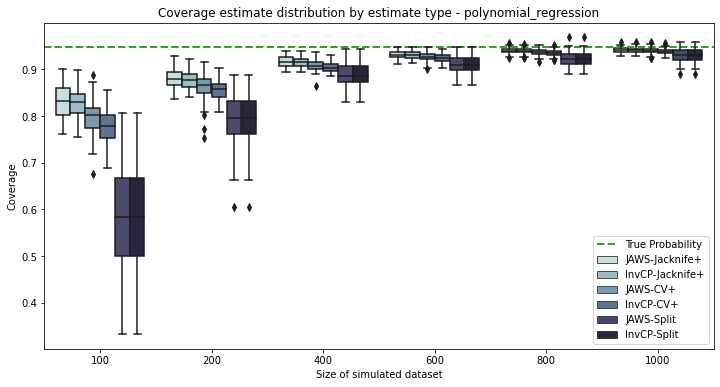

In [22]:
coverage_by_type(['JAWS-Jacknife+','InvCP-Jacknife+', 'JAWS-CV+', 'InvCP-CV+', 'JAWS-Split', 'InvCP-Split'], sim_data_size_range, threshold_type, muh_fun)

In [23]:
def coverage_by_bias(cp_types, sim_data_size, threshold_type, model, bias_range):
    
    dataset = 'simulated'
    
    mean_coverage_by_bias = []
    true_prob = []
    for i in tqdm.tqdm(range(len(bias_range))):
        mean_coverage_by_bias.append(pd.read_csv(dataset + '/bias_' + str(bias_range[i]) +'/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv'))
        mean_coverage_by_bias[i]['Residuals'] = residuals_prob(sim_data_size, model, ntrial)
        mean_coverage_by_bias[i]['bias'] = np.repeat(bias_range[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/bias_' + str(bias_range[i]) +'/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])

    mean_coverage_by_bias_transform = pd.melt(pd.concat([mean_coverage_by_bias[0],
                                                          mean_coverage_by_bias[1],
                                                          mean_coverage_by_bias[2],
                                                          mean_coverage_by_bias[3],
                                                          #mean_coverage_by_bias[4],
                                                          # mean_coverage_by_bias[5]
                                                        ]),
                                                id_vars = ['bias'],
                                                value_vars = cp_types, 
                                                var_name = 'Legend')
    true_prob_mean = np.mean(true_prob, axis = 1)
    
    
    plt.figure(figsize = (20,6))
    for i in range(len(bias_range)):
        plt.axhline(y = true_prob_mean[i],  
                    xmin= 0.25*i, xmax=0.25*(i+1), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability' if i == 0 else "")
    sns.boxplot(x = 'bias',
                y = 'value',
                data = mean_coverage_by_bias_transform,
                palette = cmap_paired,
                hue = 'Legend',
                showmeans=True,
                meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

    #plt.legend(loc = 'upper left')
    plt.ylabel('Coverage')
    plt.xlabel('Covariate shift - Bias Parameter')
    plt.title('Coverage estimate distribution by bias')
    
    plt.savefig(dataset + '/bias_' + str(bias_range[0]) + '/sim_data_size_1000/Threshold_type_' + str(threshold_type) + '/' + \
                                     model + '/plots/coverage_estimates_by_bias_' + dataset +'.png')
    #plt.clf()
    
    return None

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.62it/s]


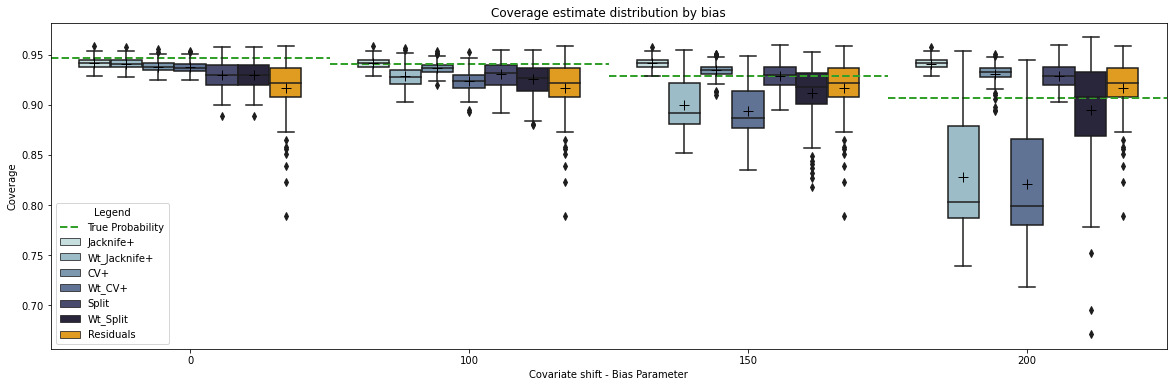

In [24]:
coverage_by_bias(cp_types, sim_data_size_range[5], threshold_type, 'polynomial_regression', bias_range)

In [30]:
def coverage_by_model(labels, sim_data_size, threshold_type, model, model_names):
    
    dataset = 'simulated'
    
    mean_coverage_by_model = []
    true_prob = []
    for i in tqdm.tqdm(range(len(model))):
        mean_coverage_by_model.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv'))
        
        if (sim_data_size == 1000):
            mean_coverage_by_model[i]['Residuals'] = residuals_prob(sim_data_size, model[i], ntrial)
            labels_to_use = labels
        else:
            labels_to_use = labels[0:-1] 
            
        mean_coverage_by_model[i]['model'] = np.repeat(model_names[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])

    mean_coverage_by_model_transform = pd.melt(pd.concat([mean_coverage_by_model[0], 
                                                          mean_coverage_by_model[1], 
                                                          mean_coverage_by_model[2], 
                                                          mean_coverage_by_model[3]
                                                          #,mean_coverage_by_model[4]
                                                         ]),
                                                id_vars = ['model'],
                                                value_vars = labels_to_use, 
                                                var_name = 'Legend')
    #mean_coverage_total = pd.concat([mean_coverage_by_model_transform, GPR_mean_prob])
    
    true_prob_mean = np.mean(true_prob, axis = 1)
    
    plt.figure(figsize = (12,6))
    
    for i in range(len(model)):
        plt.axhline(y = true_prob_mean[i],  
                    xmin = 0.25*i, xmax = 0.25*(i+1), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability' if i == 0 else "")
    sns.boxplot(x = 'model',
                y = 'value',
                data = mean_coverage_by_model_transform,
                hue = 'Legend',
                palette = cmap,
                showmeans = True,
                meanprops = {"marker": "+",
                             "markeredgecolor": "black",
                             "markersize": "10"})
    plt.legend(loc = 'upper left')
    plt.ylabel('Coverage')
    #plt.ylim((0.65,1.0))
    plt.xlabel('Model')
    plt.title('Coverage estimate distribution by model')
    
    for i in range(len(model)):
        plt.savefig(dataset +  '/No_bias/sim_data_size_1000/Threshold_type_' + str(threshold_type) + '/' + \
                                    model[i] + '/plots/coverage_by_model_' + dataset +'_compare.png')
    #plt.clf()
    
    return None

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 79.74it/s]


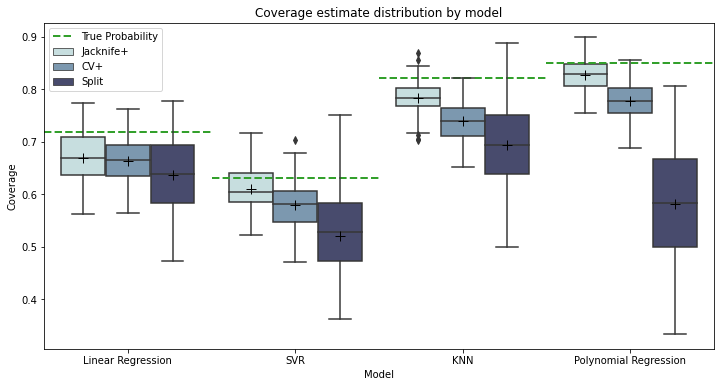

In [26]:
coverage_by_model(compare_labels, 100, threshold_type, muh_fun_range, models)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.30it/s]


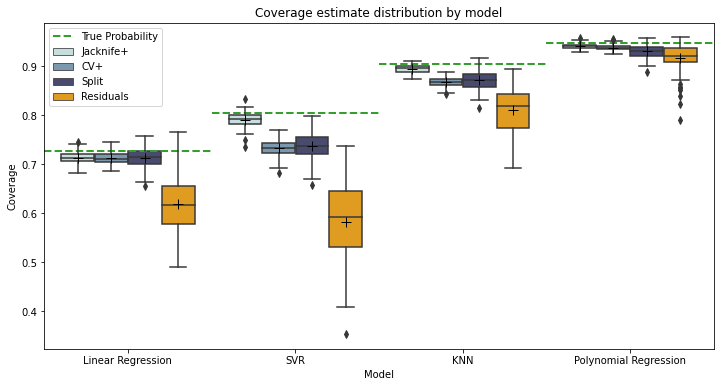

In [31]:
coverage_by_model(compare_labels, 1000, threshold_type, muh_fun_range, models)

In [28]:
def coverage_by_dataset_size(cp_types, sim_data_size, threshold_type, model, bias):
    
    dataset = 'simulated'

    mean_coverage_by_dataset_size = []
    true_prob = []

    for i in tqdm.tqdm(range(len(sim_data_size))):
        mean_coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                '/Threshold_type_' + str(threshold_type) + '/' + model + \
                                '/JAWS_coverage_by_trial/mean_coverage.csv'))
        #mean_coverage_by_dataset_size[i]['Residuals'] = residuals_prob(bias, sim_data_size[i], model, ntrial)
        mean_coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])
        
    mean_coverage_by_dataset_size_transform = pd.melt(pd.concat([mean_coverage_by_dataset_size[0], 
                                                         mean_coverage_by_dataset_size[1], 
                                                         mean_coverage_by_dataset_size[2], 
                                                         mean_coverage_by_dataset_size[3], 
                                                         mean_coverage_by_dataset_size[4],
                                                         mean_coverage_by_dataset_size[5]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')
    
    
    true_prob_mean = np.mean(true_prob, axis = 1)
        
    plt.figure(figsize = (12,6))
    
    for i in range(len(sim_data_size)):
        plt.axhline(y = true_prob_mean[i],  
                xmin = 0.15*(1.15*i), xmax = 0.15*(1.15*i+1), 
                color = '#33a02c',
                lw = 2,
                linestyle = '--', 
                label = 'True Probability' if i == 0 else "") 

    #plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
    sns.boxplot(x = 'sim_data_size',
        y = 'value',
        data = mean_coverage_by_dataset_size_transform,
        palette = cmap,
        hue = 'Legend')
    
    plt.legend(loc = 'upper left')
    #plt.ylim((0.75,0.975))
    plt.ylabel('Coverage')
    plt.xlabel('Size of simulated dataset')
    plt.title('Coverage estimate distribution by size of dataset - ' + model)
    plt.savefig(dataset + '/No_bias/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
                            model + '/plots/coverage_estimates_by_size_' + dataset +'.png')
    #plt.clf()
    
    return None

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 146.34it/s]


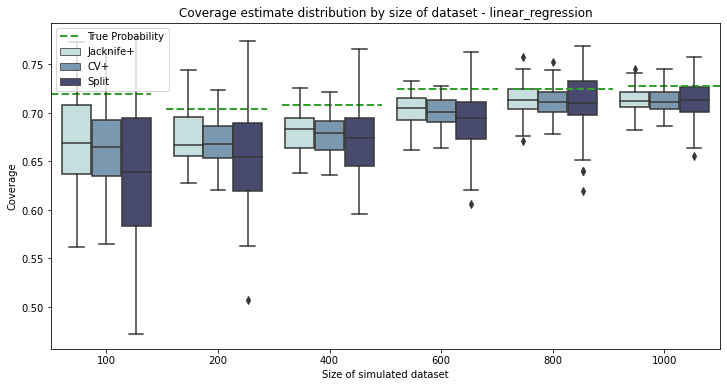

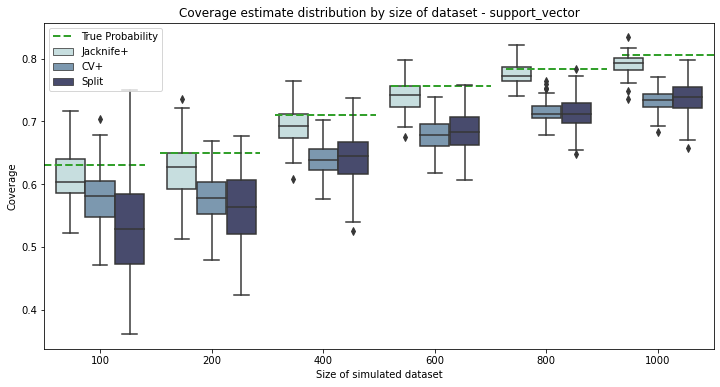

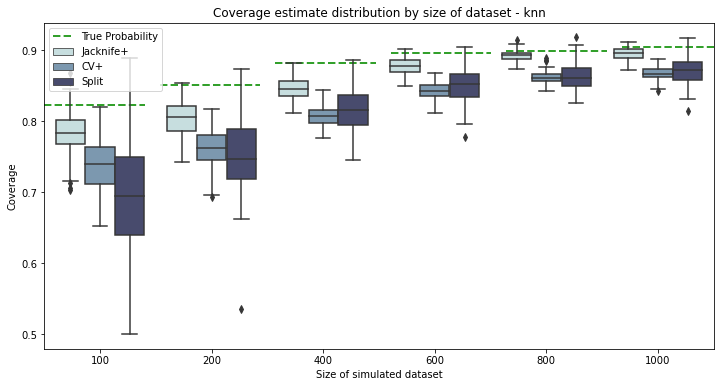

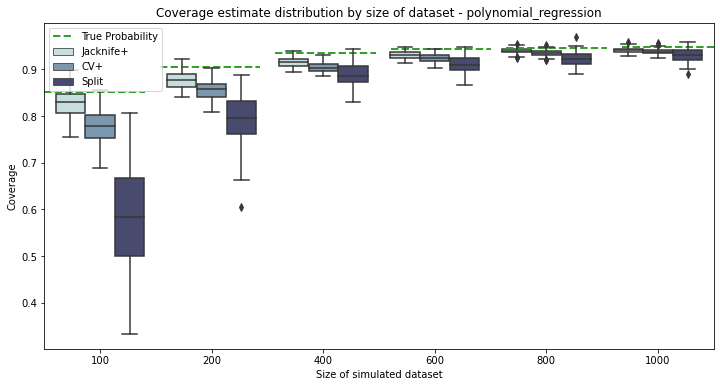

In [29]:
for i in range(len(muh_fun_range)):
    coverage_by_dataset_size(compare_labels[0:-1], sim_data_size_range, threshold_type, muh_fun_range[i], bias)